In [175]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, pi, exp

#from pandas_datareader import data
from statsmodels.tsa import stattools
from statsmodels.tsa import arima_model
from statsmodels.graphics import gofplots
from statsmodels.regression import linear_model

from scipy import stats
import scipy.integrate
import scipy.special
# from arch.unitroot import PhillipsPerron
import yfinance as yf
from sklearn.linear_model import LinearRegression

import os
import matplotlib.pyplot as plt  # for plotting
from statsmodels.regression import linear_model

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import statistics
import scipy.stats as si
from scipy.stats import norm

Data Download

In [176]:
tickers = ["CSCO","BAC","GE"]
#downoad the prices and volumes for the previously read list of tickers
start_date = '2018-09-01'
end_date = '2022-06-10'
stock_data = yf.download(tickers, start=start_date, end=end_date)
print(stock_data)

[*********************100%***********************]  3 of 3 completed
            Adj Close                            Close                        \
                  BAC       CSCO         GE        BAC       CSCO         GE   
Date                                                                           
2018-08-31  28.294893  42.794437  97.180069  30.930000  47.770000  99.538460   
2018-09-04  28.487000  42.758598  95.152374  31.139999  47.730000  97.461540   
2018-09-05  28.523592  42.346516  94.326263  31.180000  47.270000  96.615387   
2018-09-06  28.358133  42.355476  93.950760  30.850000  47.279999  96.230766   
2018-09-07  28.367325  42.149429  93.124634  30.860001  47.049999  95.384613   
...               ...        ...        ...        ...        ...        ...   
2022-06-03  36.189999  45.250000  76.970001  36.189999  45.250000  76.970001   
2022-06-06  36.150002  45.330002  77.000000  36.150002  45.330002  77.000000   
2022-06-07  36.349998  45.570000  78.000000  36.349

In [177]:
# Dividend Rates
csco = yf.Ticker("csco")
a_csco = csco.info['dividendRate']
a_csco = a_csco/100
print(a_csco)

ge = yf.Ticker("ge")
a_ge = ge.info['dividendRate']
a_ge = a_ge/100
print(a_ge)

bac = yf.Ticker("bac")
a_bac = bac.info['dividendRate']
a_bac = a_bac/100
print(a_bac)


0.0152
0.0032
0.0084


In [178]:
# Working on statistics
price = stock_data['Adj Close'].values
days = price.shape[0]
ret = price[1:]/price[:-1] - 1
#print(ret)

price_tab = np.array([])
ret_tab = np.array([])
for i in range(len(price)):
    price_tab = np.append(price_tab, price[i])
for i in range(len(ret)):
    ret_tab = np.append(ret_tab, ret[i])

price_tab = price_tab.reshape(days,3)
ret_tab = ret_tab.reshape(days-1,3)

df_price = pd.DataFrame(price_tab)
df_price.columns =['CSCO', 'BAC','GE']
df_ret = pd.DataFrame(ret_tab)
df_ret.columns=['CSCO', 'BAC','GE']
# Print prices
print(df_price)
#Print returns
print(df_ret)

hist_std_csco = np.std(df_ret["CSCO"])*np.sqrt(253)
hist_std_bac = np.std(df_ret["BAC"])*np.sqrt(253)
hist_std_ge = np.std(df_ret["GE"])*np.sqrt(253)

# Historical volatility
print(hist_std_csco)
print(hist_std_bac)
print(hist_std_ge)

          CSCO        BAC         GE
0    28.294893  42.794437  97.180069
1    28.487000  42.758598  95.152374
2    28.523592  42.346516  94.326263
3    28.358133  42.355476  93.950760
4    28.367325  42.149429  93.124634
..         ...        ...        ...
945  36.189999  45.250000  76.970001
946  36.150002  45.330002  77.000000
947  36.349998  45.570000  78.000000
948  35.889999  44.919998  77.160004
949  34.509998  44.259998  74.779999

[950 rows x 3 columns]
         CSCO       BAC        GE
0    0.006789 -0.000837 -0.020865
1    0.001285 -0.009637 -0.008682
2   -0.005801  0.000212 -0.003981
3    0.000324 -0.004865 -0.008793
4   -0.001296  0.000425  0.008871
..        ...       ...       ...
944 -0.013897 -0.011793 -0.013205
945 -0.001105  0.001768  0.000390
946  0.005532  0.005294  0.012987
947 -0.012655 -0.014264 -0.010769
948 -0.038451 -0.014693 -0.030845

[949 rows x 3 columns]
0.3786747669081518
0.30679757528201895
0.4670366175376016


In [196]:
# Getting Call/Put options: Market Prices
opt_csco = csco.option_chain(date='2022-06-17')
options_cisco = opt_csco
#print(options_cisco)

opt_bac = bac.option_chain(date='2022-06-17')
options_bac = opt_bac

opt_ge = ge.option_chain(date='2022-06-17')
options_ge = opt_ge
print(options_ge)

Options(calls=       contractSymbol             lastTradeDate  strike  lastPrice   bid  \
0   GE220617C00003000 2021-07-29 14:59:53+00:00     3.0      10.35  7.50   
1   GE220617C00005000 2021-07-26 14:30:34+00:00     5.0       7.85  7.90   
2   GE220617C00008000 2021-07-26 16:15:39+00:00     8.0       5.05  5.00   
3   GE220617C00010000 2021-07-30 19:26:22+00:00    10.0       3.55  3.45   
4   GE220617C00012000 2021-07-29 17:33:12+00:00    12.0       2.37  2.17   
5   GE220617C00015000 2021-07-30 18:22:59+00:00    15.0       1.00  0.89   
6   GE220617C00017000 2021-07-30 19:27:28+00:00    17.0       0.58  0.40   
7   GE220617C00020000 2021-07-30 19:22:13+00:00    20.0       0.26  0.25   
8   GE220617C00022000 2021-07-30 14:08:46+00:00    22.0       0.18  0.15   
9   GE220617C00025000 2021-07-29 19:00:54+00:00    25.0       0.11  0.11   
10  GE220617C00045000 2022-05-26 13:42:08+00:00    45.0      31.20  0.00   
11  GE220617C00050000 2022-05-24 19:30:04+00:00    50.0      24.30  0.00  

In [180]:
# Get Market Call Prices - CSCO
strike_call_list_cisco = (options_cisco[0]['strike'])
market_price_call_cisco = (options_cisco[0]['lastPrice'])
market_implied_vol_call_cisco = (options_cisco[0]['impliedVolatility'])
df_market_call_csco = pd.DataFrame({'strike':strike_call_list_cisco ,
                   'lastPrice':market_price_call_cisco ,
                   'impliedVolatility': market_implied_vol_call_cisco})
#print(df_market_call)

# Get Market Put Prices - CSCO
strike_put_list_cisco = (options_cisco[1]['strike'])
market_price_put_cisco = (options_cisco[1]['lastPrice'])
market_implied_vol_put_cisco = (options_cisco[1]['impliedVolatility'])
df_market_put_cisco = pd.DataFrame({'strike':strike_put_list_cisco ,
                   'lastPrice':market_price_put_cisco ,
                   'impliedVolatility': market_implied_vol_put_cisco})

# Get Market Call Prices - GE
strike_call_list_ge = (options_ge[0]['strike'])
market_price_call_ge = (options_ge[0]['lastPrice'])
market_implied_vol_call_ge = (options_ge[0]['impliedVolatility'])
df_market_call_ge = pd.DataFrame({'strike':strike_call_list_ge ,
                   'lastPrice':market_price_call_ge ,
                   'impliedVolatility': market_implied_vol_call_ge})
#print(df_market_call)

# Get Market Put Prices - GE
strike_put_list_ge = (options_ge[1]['strike'])
market_price_put_ge = (options_ge[1]['lastPrice'])
market_implied_vol_put_ge = (options_ge[1]['impliedVolatility'])
df_market_put_ge = pd.DataFrame({'strike':strike_put_list_ge ,
                   'lastPrice':market_price_put_ge ,
                   'impliedVolatility': market_implied_vol_put_ge})

#print(df_market_call_ge)

Parameters: Black-Scholes

In [191]:
S_0_CSCO = 43.42            # stock price: CSCO
S_0_GE = 71.83              # stock price: GE
r = 1.14/100                # interest rate

sigma_CSCO = hist_std_csco  # historical (std) volatility CSCO
sigma_GE = hist_std_ge      # historical (std) volatility GE

K_CSCO = 47.50              # specific strike CSCO
K_GE = 72                   # specific strike GE

# Getting the quoted implied volatility: CSCO
market_call_CSCO = df_market_call_csco.loc[df_market_call_csco['strike']==K_CSCO]
implied_vol_CSCO_Call = (np.array(market_call_CSCO["impliedVolatility"]))
implied_vol_CSCO_Call = implied_vol_CSCO_Call[0]

market_put_CSCO = df_market_put_cisco.loc[df_market_put_cisco['strike']==K_CSCO]
implied_vol_CSCO_Put = (np.array(market_put_CSCO["impliedVolatility"]))
implied_vol_CSCO_Put = implied_vol_CSCO_Put[0]

# Getting the quoted implied volatility: GE
market_call_ge = df_market_call_ge.loc[df_market_call_ge['strike']==K_GE]
implied_vol_ge_Call = (np.array(market_call_ge["impliedVolatility"]))
implied_vol_ge_Call = implied_vol_ge_Call[0]

market_put_ge = df_market_put_ge.loc[df_market_put_ge['strike']==K_GE]
implied_vol_ge_Put = (np.array(market_put_ge["impliedVolatility"]))
implied_vol_ge_Put = implied_vol_ge_Put[0]
print(implied_vol_CSCO_Call)

0.2500075


Black-Scholes-Merton: Options Prices

In [182]:
def black_scholes_merton_call_div(S, K, T, r, a, sigma):

    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #a: dividend yield
    #sigma: volatility of underlying asset

    d1 = (np.log(S/K) + (r-a+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-a-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    call = (S*np.exp(-a*T) * si.norm.cdf(d1, 0.0, 1.0) - K*np.exp(-r*T) * si.norm.cdf(d2, 0.0, 1.0))
    return call


def black_scholes_put_div(S, K, T, r, a, sigma):

    d1_bs = (np.log(S/K) + (r-a+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2_bs = (np.log(S/K) + (r-a-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    put = (K*np.exp(-r*T) * si.norm.cdf(-d2_bs, 0.0, 1.0) - S*np.exp(-a*T) * si.norm.cdf(-d1_bs, 0.0, 1.0))
    return put

In [183]:
T_test = 5/365
# Black-Scholes CSCO results
call_bs_CSCO =  black_scholes_merton_call_div(S_0_CSCO, K_CSCO, T_test, r, a_csco, hist_std_csco)
put_bs_CSCO =  black_scholes_put_div(S_0_CSCO, K_CSCO, T_test, r, a_csco, hist_std_csco)

call_bs_CSCO_implied_vol =  black_scholes_merton_call_div(S_0_CSCO, K_CSCO, T_test, r, a_csco, implied_vol_CSCO_Call)
put_bs_CSCO_implied_vol =  black_scholes_put_div(S_0_CSCO, K_CSCO, T_test, r, a_csco, implied_vol_CSCO_Put)

# Black-Scholes GE results
call_bs_GE =  black_scholes_merton_call_div(S_0_GE, K_GE, T_test, r, a_ge, hist_std_ge)
put_bs_GE =  black_scholes_put_div(S_0_GE, K_GE, T_test, r, a_ge, hist_std_ge)

call_bs_GE_implied_vol =  black_scholes_merton_call_div(S_0_GE, K_GE, T_test, r, a_ge, implied_vol_ge_Call)
put_bs_GE_implied_vol =  black_scholes_put_div(S_0_GE, K_GE, T_test, r, a_ge, implied_vol_ge_Put)

Black-Scholes-Merton: Greeks


In [184]:
def d1(S,K,T,r,a,sigma):
    return(log(S/K)+(r-a+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,a,sigma):
    return d1(S,K,T,r,a,sigma)-sigma*sqrt(T)

############## CALL OPTION ##############

def call_delta(S,K,T,r,a,sigma):
    return exp(-a*T)*norm.cdf(d1(S,K,T,r,sigma))

def call_gamma(S,K,T,r,a,sigma):
    return exp(-a*T)*norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))

def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))

############## PUT OPTION ##############

def put_delta(S,K,T,r,a,sigma):
    return -exp(-a*T)*norm.cdf(-d1(S,K,T,r,sigma))

def put_gamma(S,K,T,r,a,sigma):
    return exp(-a*T)*norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))

def put_vega(S,K,T,r,a,sigma):
    return 0.01*exp(-a*T)*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))

Monte-Carlo Simulation


Text(0, 0.5, 'frequency')

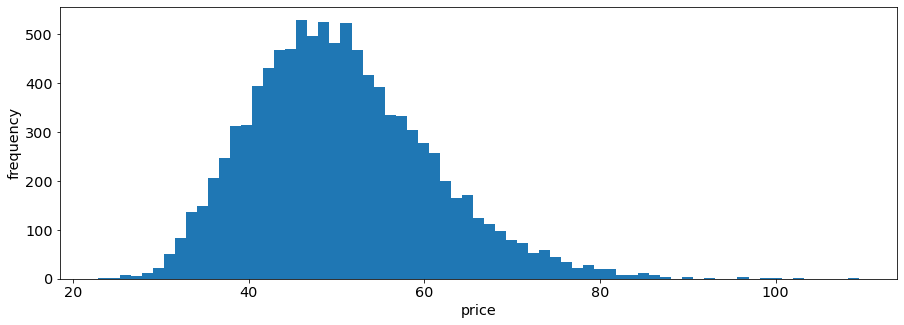

In [185]:
# Monte-Carlo Simulation:

# Parameters
T = 1.0
N = 10000
S_0 = 50
sigma = 0.20

# Example one-period simulation

# lognormal distribution of the price

Z = np.random.normal(size=N)
S_T = S_0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*Z)
plt.hist(S_T, bins='auto')
plt.xlabel('price')
plt.ylabel('frequency')



In [186]:
# Monte Carlo simulation: European Option

call_payoff_maturity_CSCO = []
put_payoff_maturity_CSCO = []
call_payoff_maturity_GE = []
put_payoff_maturity_GE = []


days_test = 5 # 1 week = 5 trading days
dt = T/365

S_CSCO = np.zeros((days_test+1, N))
S_CSCO[0] = S_0_CSCO
S_GE = np.zeros((days_test+1, N))
S_GE[0] = S_0_GE

for t in range(1, days_test+1):
    Z_CSCO = np.random.normal(size=N)
    Z_GE = np.random.normal(size=N)
    S_CSCO[t] = S_CSCO[t-1]*np.exp((r-(a_csco/100)-0.5*sigma_CSCO**2)*dt+sigma_CSCO*np.sqrt(dt)*Z_CSCO)
    S_GE[t] = S_GE[t-1]*np.exp((r-(a_ge/100)-0.5*sigma_GE**2)*dt+sigma_GE*np.sqrt(dt)*Z_GE)

Valuation (European)

In [187]:
S_T_CSCO = S_CSCO[-1]
S_T_GE = S_GE[-1]
for i in range(len(S_T_CSCO)):
    call_payoff_maturity_CSCO.append(max(S_T_CSCO[i]-K_CSCO,0))
    put_payoff_maturity_CSCO.append(max(K_CSCO-S_T_CSCO[i],0))

    call_payoff_maturity_GE.append(max(S_T_GE[i]-K_GE,0))
    put_payoff_maturity_GE.append(max(K_GE-S_T_GE[i],0))

# Price of CSCO options: expiry on June 17, 2022
VMC_call_CSCO = np.mean(call_payoff_maturity_CSCO)
C_0_CSCO = VMC_call_CSCO*np.exp(-r*days_test/365)
print(C_0_CSCO)

VMC_put_CSCO = np.mean(put_payoff_maturity_CSCO)
P_0_CSCO = VMC_put_CSCO*np.exp(-r*days_test/365)
print(P_0_CSCO)

# Price of GE options: expiry on June 17, 2022
VMC_call_GE = np.mean(call_payoff_maturity_GE)
C_0_GE = VMC_call_GE*np.exp(-r*days_test/365)
print(C_0_GE)

VMC_put_GE = np.mean(put_payoff_maturity_GE)
P_0_GE = VMC_put_GE*np.exp(-r*days_test/365)
print(P_0_GE)

0.015277778526255009
4.085823553096805
1.495734989510559
1.6615070213215068


Recap Results: Market Prices, Black-Scholes formulas, Black-Scholes Monte-Carlo

In [195]:
# Market Prices
market_call_CSCO = df_market_call_csco.loc[df_market_call_csco['strike']==K_CSCO]
market_put_CSCO = df_market_put_cisco.loc[df_market_put_cisco['strike']==K_CSCO]

print("CSCO Call prices:")
print("CSCO Market call: ", market_call_CSCO)
print("CSCO Black-Scholes call with implied volatility: ", call_bs_CSCO_implied_vol)
print("CSCO Black-Scholes call with historical volatility: ", call_bs_CSCO)
print("EU CSCO call with MC estimation: ", C_0_CSCO)
print()
print("CSCO Put prices:")
print("CSCO Market put: ", market_put_CSCO)
print("CSCO Black-Scholes put with implied volatility: ", put_bs_CSCO_implied_vol)
print("CSCO Black-Scholes put with historical volatility: ", put_bs_CSCO)
print("EU CSCO put with MC estimation: ", P_0_CSCO)


CSCO Call prices:
CSCO Market call:      strike  lastPrice  impliedVolatility
28    47.5       0.03           0.250007
CSCO Black-Scholes call with implied volatility:  0.00039417420238493234
CSCO Black-Scholes call with historical volatility:  0.015863384416788695
EU CSCO call with MC estimation:  0.015277778526255009

CSCO Put prices:
CSCO Market put:      strike  lastPrice  impliedVolatility
28    47.5       3.95            0.00001
CSCO Black-Scholes put with implied volatility:  4.081622706485092
CSCO Black-Scholes put with historical volatility:  4.0974860909018815
EU CSCO put with MC estimation:  4.085823553096805


In [189]:
market_call_ge = df_market_call_ge.loc[df_market_call_ge['strike']==K_GE]
market_put_ge = df_market_put_ge.loc[df_market_put_ge['strike']==K_GE]

print("GE Call prices:")
print("GE Market call: ", market_call_ge)
print("GE Black-Scholes call with implied volatility: ", call_bs_GE_implied_vol)
print("GE Black-Scholes call with historical volatility: ", call_bs_GE)
print("EU GE call with MC estimation: ", C_0_GE)
print()
print("GE Put prices:")
print("GE Market put: ", market_put_ge)
print("GE Black-Scholes call with implied volatility: ", put_bs_GE_implied_vol)
print("GE Black-Scholes put with historical volatility: ", put_bs_GE)
print("EU GE put with MC estimation: ", P_0_GE)

GE Call prices:
GE Market call:      strike  lastPrice  impliedVolatility
22    72.0        1.4            0.03126
GE Black-Scholes call with implied volatility:  0.04327417837966152
GE Black-Scholes call with historical volatility:  1.4882881783002162
EU GE call with MC estimation:  1.495734989510559

GE Put prices:
GE Market put:      strike  lastPrice  impliedVolatility
20    72.0        2.0            0.00001
GE Black-Scholes call with implied volatility:  0.16190568559810004
GE Black-Scholes put with historical volatility:  1.6501938638983091
EU GE put with MC estimation:  1.6615070213215068
